In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from umap import UMAP

# Practica 2: Procesamiento de Datasets
### Base de Datos: Riesgo para la Salud Materna

##### Realizado por: Ixchel Dafne Avendaño Pacheco 

##### Matricula: 23265456

<img src=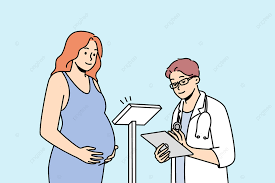 >

Iniciamos cargando la base de datos

In [3]:
df = pd.read_csv(r'Maternal.csv')

Imprimimos la base de datos

In [4]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,10,100,50,6.0,99.0,70,2
1,10,100,50,6.0,99.0,70,2
2,10,70,50,6.9,98.0,70,1
3,10,85,65,6.9,98.0,70,1
4,12,95,60,6.9,98.0,65,2


Verificamos las caracteristicas de los datos a trabajar

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


Se muestra el histogragama para observar los datos antes de procesarlos 

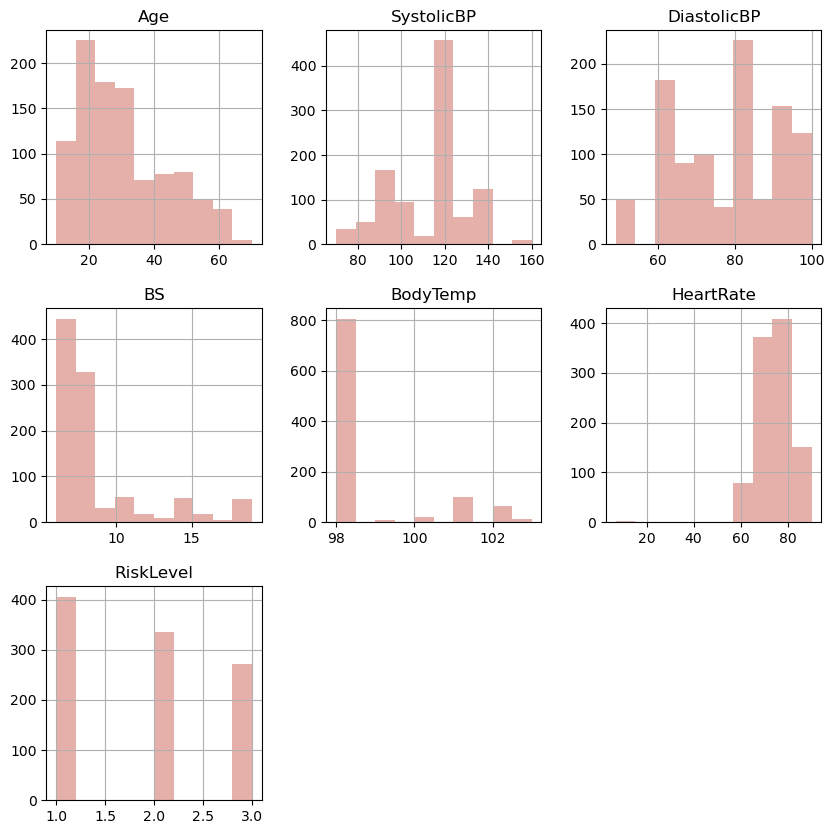

In [6]:
df.hist(figsize= (10,10), color='#E6B0AA' );

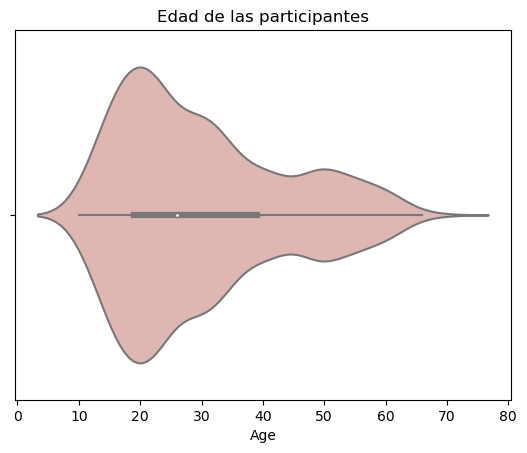

In [7]:
x=np.arange(len(df['Age']))
sns.violinplot(x=df["Age"], color='#E6B0AA');
plt.title("Edad de las participantes");

#### Limpieza de datos 

In [8]:
#Linea para saber que valores unicos posee una clase
df['Age'].unique()

array([10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 48, 49, 50, 51, 54, 55, 56, 59, 60, 62, 63, 65, 66, 70],
      dtype=int64)

In [9]:
#Linea para saber cual es la frecuencia de esos valres unicos
df['Age'].value_counts();

Remplazamos las edades del rango de 50 a 70 por un valor entre 22 y 35. Observamos que ahora la grafica se carga en el valor de 35 y además la cola derecha desaparece. 
Justificación: Se sabe que no es posible que una mujer mayor de sesenta años pueda quedar embarazada. Además es poco probable que una mujer mayor de 50 pueda llegar hasta el parto de manera saludable.

In [10]:
df['Age'] = df['Age'].replace({70 : 29})
df['Age'] = df['Age'].replace({66 : 29})
df['Age'] = df['Age'].replace({65 : 22})
df['Age'] = df['Age'].replace({63 : 22})
df['Age'] = df['Age'].replace({62 : 32})
df['Age'] = df['Age'].replace({60 : 32})
df['Age'] = df['Age'].replace({59 : 28})
df['Age'] = df['Age'].replace({56 : 28})
df['Age'] = df['Age'].replace({55 : 35})
df['Age'] = df['Age'].replace({54 : 35})
df['Age'] = df['Age'].replace({51 : 34})
df['Age'] = df['Age'].replace({50 : 34})

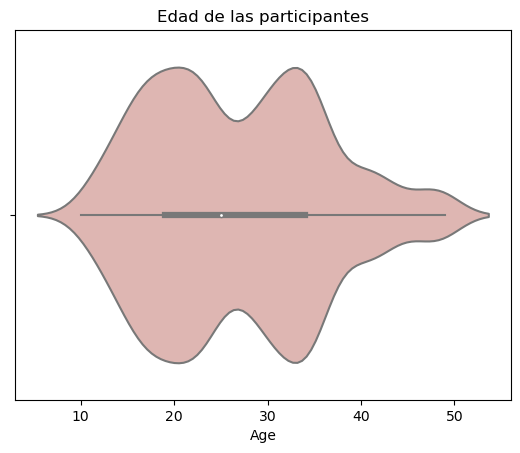

In [11]:
sns.violinplot(x=df["Age"], color='#E6B0AA');
plt.title("Edad de las participantes");

Aunado a ello eliminamos la clase de Presión diastólica, pues notamos que esta clase no aporta información relevante.

In [12]:
df = df.drop(['DiastolicBP'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         1014 non-null   int64  
 1   SystolicBP  1014 non-null   int64  
 2   BS          1014 non-null   float64
 3   BodyTemp    1014 non-null   float64
 4   HeartRate   1014 non-null   int64  
 5   RiskLevel   1014 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.7 KB


#### Seleccion de atributos
La selección de atributos es una técnica utilizada en ciencia de datos para reducir la cantidad de variables o atributos en un conjunto de datos, con el objetivo de mejorar la precisión y eficiencia de los modelos de aprendizaje automático


Iniciamos con la separacion de atributos de la clase

In [13]:
X = df.iloc[:, 0:-1]   #Separamos a los atributos 
y = df.iloc[:, -1]     #Separamos a la clase

Observamos el peso de cada atributo con respecto a la clase

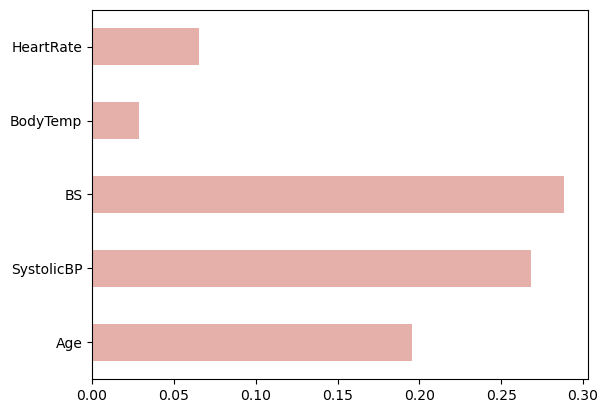

In [14]:
X_nueva = mutual_info_classif(X, y)
feat_imp = pd.Series(X_nueva, df.columns[0:len(df.columns)-1])
feat_imp.plot(kind='barh', color='#E6B0AA')
plt.show()

Empleamos la función RandomForestClassifer para poder conocer los atributos con mayor peso 

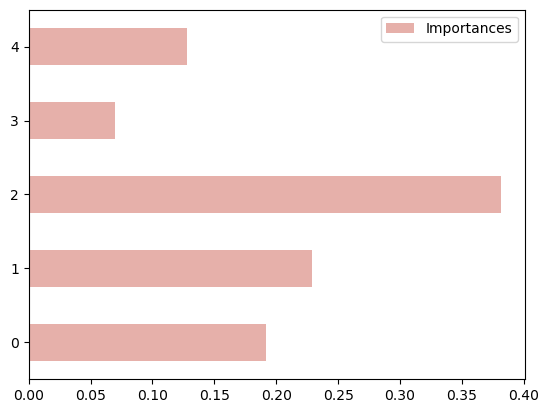

In [15]:
model = RandomForestClassifier(n_estimators=340)
model.fit(X,y)
importances = model.feature_importances_

feat_df = pd.DataFrame({"Features": pd.DataFrame(X).columns, "Importances": importances})
feat_df.set_index('Importances')
feat_df.plot.barh(color='#E6B0AA');


Observamos que amboos métodos despliegan resultados similares

In [16]:
df = df.drop(['Age'], axis = 1)
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SystolicBP  1014 non-null   int64  
 1   BS          1014 non-null   float64
 2   BodyTemp    1014 non-null   float64
 3   HeartRate   1014 non-null   int64  
 4   RiskLevel   1014 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 39.7 KB


#### Reducción de dimensionalidad 

Esta técnica se emplea a menudo en el aprendizaje automático para obtener un modelo predictivo más ajustado mientras se resuelven los problemas de regresión y clasificación que presentan los algoritmos

In [17]:
X_PCA = PCA(n_components=5).fit_transform(X)

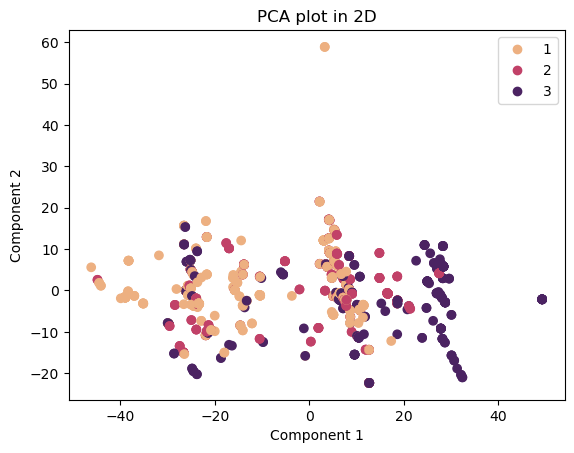

In [18]:
scatter = plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y, cmap='flare')      #convertimos 784 columnas en dos 
plt.title('PCA plot in 2D') 
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()

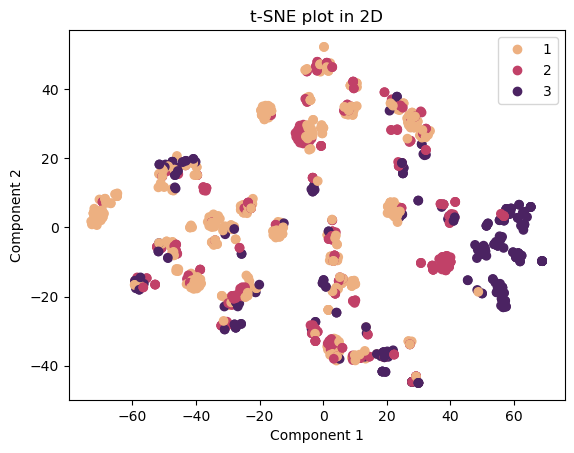

In [19]:
X_TSNE = TSNE().fit_transform(X)    #No debemos de pasarle las clases es decir pasarle a y 

scatter = plt.scatter(X_TSNE[:,0], X_TSNE[:,1], c=y, cmap='flare')
plt.title('t-SNE plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()

##### Regresión Lineal (Intento)

In [20]:
df_new = df[['BS', 'SystolicBP']]
df_new.head()

df_new.shape

(1014, 2)

In [21]:
#Parte de los datos  los primeros son para entrenamiento 
train_input = np.array(df_new.BS[0:762]).reshape(762,1)
#Los segundos son para la prediccion 
train_output  = np.array(df_new.SystolicBP[0:762]).reshape(762,1)

In [22]:
# valid dataset and labels
test_input = np.array(df_new.BS[762:1015]).reshape(252,1)
test_output  = np.array(df_new.SystolicBP[762:1015]).reshape(252,1)

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_input, train_output)
print(reg.score(train_input, train_output))

0.021734787372034048


In [24]:
#Prediction on test data
print(reg.coef_)
print(reg.intercept_)
y_pred = reg.predict(test_input)

[[1.33254581]]
[99.34815944]


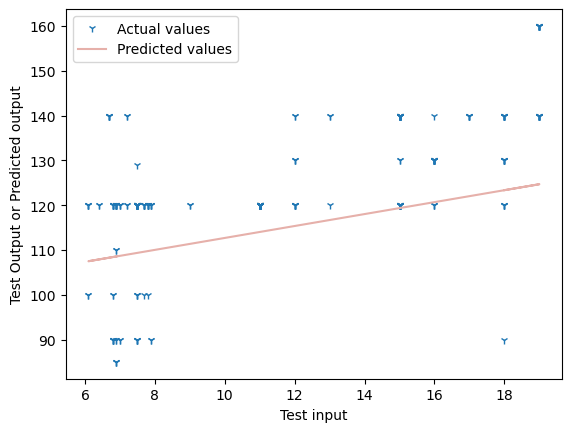

In [25]:
# Plot the regression line with actual data pointa
plt.plot(test_input, test_output, '1', label='Actual values')
plt.plot(test_input, y_pred, label='Predicted values', color='#E6B0AA')
plt.xlabel('Test input')
plt.ylabel('Test Output or Predicted output')
plt.legend()
plt.show()